### **1. Sentiment Analysis**
---
Use the newsapi to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.Use descriptive statistics to answer the following questions:

1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [26]:
# Initial imports
import os
import pandas as pd
from datetime import datetime, timedelta
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from newsapi.newsapi_client import NewsApiClient

import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [27]:
# Load .env enviroment variables
load_dotenv()

# Read your api key environment variable
news_api_key = os.getenv("NEWS_API_KEY")



In [28]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=news_api_key)

In [31]:
# Fetch the Bitcoin news articles

bitcoin_headlines = newsapi.get_everything(
    q="bitcoin AND BTC",
    language="en"
)

In [33]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(
    q="ethereum AND ETH",
    language="en"
)

In [38]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        sentiment = analyzer.polarity_scores(article['content'])
      
        bitcoin_sentiments.append({
            "Text": article["content"],
            "Compound": sentiment["compound"],
            "Positive": sentiment["pos"],
            "Negative": sentiment["neg"],
            "Neutral": sentiment["neu"]
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols =["Compound", "Negative", "Neutral", "Positive", "Text"]
btc_df = btc_df[cols]

btc_df.head()

,Compound,Negative,Neutral,Positive,Text
0,-0.5037,0.114,0.886,0.0,"As the man himself said, it was inevitable. \r..."
1,0.0000,0.000,1.000,0.0,"February\r\n1, 2021\r\n6 min read\r\nThis stor..."
2,0.0000,0.000,1.000,0.0,TL;DR: The Bitcoin and Cryptocurrency Mastery ...
3,-0.3400,0.068,0.932,0.0,"January\r\n25, 2021\r\n4 min read\r\nThis arti..."
4,-0.3400,0.066,0.934,0.0,"January\r\n28, 2021\r\n4 min read\r\nThis arti..."


In [39]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        sentiment = analyzer.polarity_scores(article['content'])
      
        ethereum_sentiments.append({
            "Text": article["content"],
            "Compound": sentiment["compound"],
            "Positive": sentiment["pos"],
            "Negative": sentiment["neg"],
            "Neutral": sentiment["neu"]
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["Compound", "Negative", "Neutral", "Positive", "Text"]
eth_df = eth_df[cols]

eth_df.head()

,Compound,Negative,Neutral,Positive,Text
0,-0.3919,0.079,0.921,0.000,The Bitcoin price recovered back to around $36...
1,0.3612,0.037,0.888,0.076,"After two months of hard work, time and effort..."
2,0.0000,0.000,1.000,0.000,"LAS VEGAS--(BUSINESS WIRE)--Jan 13, 2021--\r\n..."
3,-0.1027,0.046,0.954,0.000,Eth 2.0 is looking at its first hard fork this...
4,0.5405,0.000,0.857,0.143,"In the legacy financial world, yield has dried..."


In [40]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,Compound,Negative,Neutral,Positive
count,18.000000,18.000000,18.000000,18.000000
mean,-0.090950,0.040444,0.928167,0.031389
std,0.360585,0.044527,0.077321,0.075695
min,-0.611500,0.000000,0.687000,0.000000
25%,-0.340000,0.000000,0.897500,0.000000
50%,0.000000,0.026000,0.932000,0.000000
75%,0.019350,0.070250,1.000000,0.028500
max,0.886000,0.121000,1.000000,0.313000


In [41]:
# Describe the Ethereum Sentiment
eth_df.describe()


,Compound,Negative,Neutral,Positive
count,19.000000,19.000000,19.000000,19.000000
mean,-0.048268,0.051211,0.907632,0.041211
std,0.458395,0.066504,0.069987,0.054477
min,-0.778300,0.000000,0.740000,0.000000
25%,-0.434300,0.000000,0.860500,0.000000
50%,0.000000,0.000000,0.921000,0.000000
75%,0.340000,0.086500,0.944000,0.073000
max,0.647800,0.175000,1.000000,0.154000


**Questions:**

Q: Which coin had the highest mean positive score?

A: Ethereum

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Ethereum

### **2. Natural Language Processing**
---


**Tokenizer**

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:

1. Lowercase each word. 
2. Remove Punctuation.
3. Remove Stopwords.

In [43]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [51]:
# Expand the default stop words list if necessary
addl_stopwords = ['',',','`','bitcoin', 'cryptocurrency'] 

In [52]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    text = word_tokenize(text)

    # Convert the words to lowercase
    text = [word.lower() for word in text]
    
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z ]")
    text = [regex.sub('', word) for word in text]
    
    # Remove the stop words
    sw = set(stopwords.words('english') + addl_stopwords)
    
    # Lemmatize Words into root words
    
    lemmatizer = WordNetLemmatizer() #root words
    text = [lemmatizer.lemmatize(word) for word in text]
    text = [word for word in text if word not in sw]
    
    return text

In [53]:
# Create a new tokens column for bitcoin
btc_tokens = []
[btc_tokens.append(tokenizer(text)) for text in btc_df.Text]   
btc_df['Tokens'] = btc_tokens
btc_df.head()


,Compound,Negative,Neutral,Positive,Text,Tokens
0,-0.5037,0.114,0.886,0.0,"As the man himself said, it was inevitable. \r...","[man, said, wa, inevitable, friday, tesla, ceo..."
1,0.0000,0.000,1.000,0.0,"February\r\n1, 2021\r\n6 min read\r\nThis stor...","[february, min, read, story, originally, appea..."
2,0.0000,0.000,1.000,0.0,TL;DR: The Bitcoin and Cryptocurrency Mastery ...,"[tl, dr, mastery, bundle, sale, jan, saving, l..."
3,-0.3400,0.068,0.932,0.0,"January\r\n25, 2021\r\n4 min read\r\nThis arti...","[january, min, read, article, wa, translated, ..."
4,-0.3400,0.066,0.934,0.0,"January\r\n28, 2021\r\n4 min read\r\nThis arti...","[january, min, read, article, wa, translated, ..."


In [54]:
# Create a new tokens column for ethereum
eth_tokens = []
[eth_tokens.append(tokenizer(text)) for text in eth_df.Text]   
eth_df['Tokens'] = eth_tokens
eth_df.head()


,Compound,Negative,Neutral,Positive,Text,Tokens
0,-0.3919,0.079,0.921,0.000,The Bitcoin price recovered back to around $36...,"[price, recovered, back, around, tuesday, mark..."
1,0.3612,0.037,0.888,0.076,"After two months of hard work, time and effort...","[two, month, hard, work, time, effort, pleased..."
2,0.0000,0.000,1.000,0.000,"LAS VEGAS--(BUSINESS WIRE)--Jan 13, 2021--\r\n...","[la, vega, business, wire, jan, dpw, holding, ..."
3,-0.1027,0.046,0.954,0.000,Eth 2.0 is looking at its first hard fork this...,"[eth, looking, first, hard, fork, year, ethere..."
4,0.5405,0.000,0.857,0.143,"In the legacy financial world, yield has dried...","[legacy, financial, world, yield, ha, dried, y..."


**NGrams and Frequency Analysis**

---
In this section you will look at the ngrams and word frequency for each coin.

1. Use NLTK to produce the n-grams for N = 2.
2. List the top 10 words for each coin.

In [55]:
from collections import Counter
from nltk import ngrams

In [86]:
# Generate the Bitcoin N-grams where N=2
btc_bigram_counts = [Counter(ngrams(tokens, n=2)) for tokens in btc_df.Tokens]
dict(btc_bigram_counts[0].most_common(10))

{('man', 'said'): 1,
 ('said', 'wa'): 1,
 ('wa', 'inevitable'): 1,
 ('inevitable', 'friday'): 1,
 ('friday', 'tesla'): 1,
 ('tesla', 'ceo'): 1,
 ('ceo', 'elon'): 1,
 ('elon', 'musk'): 1,
 ('musk', 'changed'): 1,
 ('changed', 'twitter'): 1}

In [87]:
# Generate the Ethereum N-grams where N=2
eth_bigram_counts = [Counter(ngrams(tokens, n=2)) for tokens in eth_df.Tokens]
dict(eth_bigram_counts[0].most_common(10))

{('price', 'recovered'): 1,
 ('recovered', 'back'): 1,
 ('back', 'around'): 1,
 ('around', 'tuesday'): 1,
 ('tuesday', 'market'): 1,
 ('market', 'recovered'): 1,
 ('recovered', 'monday'): 1,
 ('monday', 'plunge'): 1,
 ('plunge', 'volatility'): 1,
 ('volatility', 'remains'): 1}

In [82]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [90]:
# Use token_count to get the top 10 words for Bitcoin
# Get the top 10 words for Bitcoin
for tokens in btc_df.Tokens:
    bigstr = tokens
btc_token_count = token_count(bigstr)
btc_token_count

[('char', 526),
 ('min', 180),
 ('read', 180),
 ('wa', 150),
 ('market', 150),
 ('price', 150),
 ('january', 150),
 ('may', 150),
 ('expressed', 120),
 ('btc', 120)]

In [92]:
# Get the top 10 words for Ethereum
bigstr = []
for tokens in eth_df.Tokens:
    bigstr += tokens
eth_token_count = token_count(bigstr)
eth_token_count

[('char', 19),
 ('price', 9),
 ('ethereum', 7),
 ('eth', 7),
 ('dpw', 7),
 ('ether', 7),
 ('high', 6),
 ('new', 6),
 ('holding', 5),
 ('market', 4)]

**Word Clouds**

---
In this section, you will generate word clouds for each coin to summarize the news for each coin

In [93]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

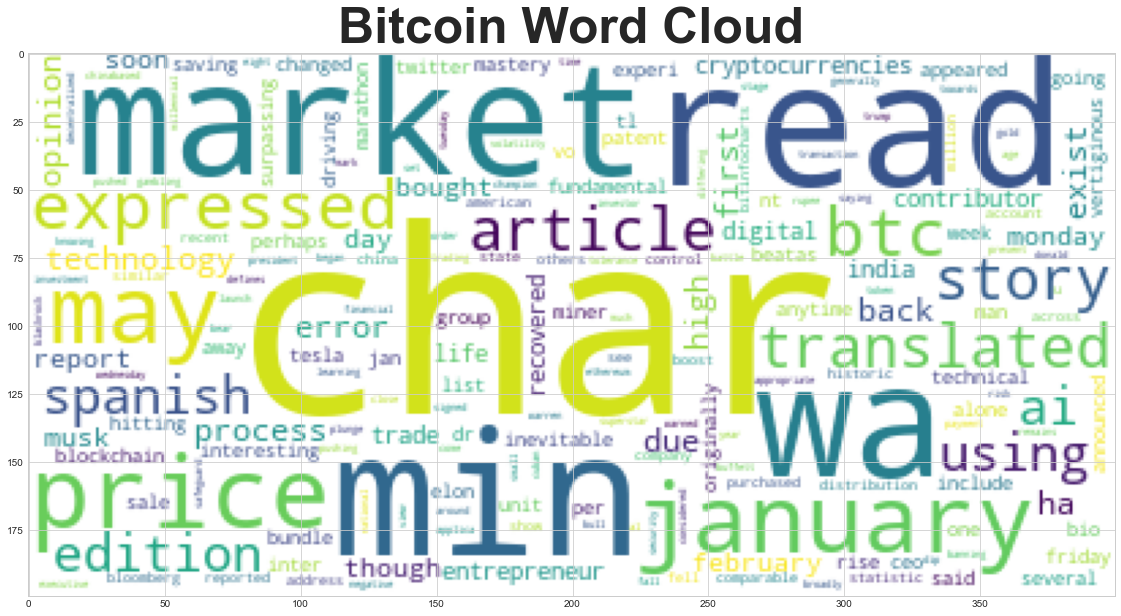

In [100]:
# Generate the Bitcoin word cloud
btc_corpus = ''
for token in btc_df.Text:
    btc_corpus += token
str1 = " ".join(str(x) for x in tokenizer(btc_corpus))
wc = WordCloud(collocations=False, background_color='white').generate(str1)
plt.title('Bitcoin Word Cloud', fontsize=50, fontweight='bold')
plt.style.use('seaborn-whitegrid')
plt.imshow(wc)
plt.show()

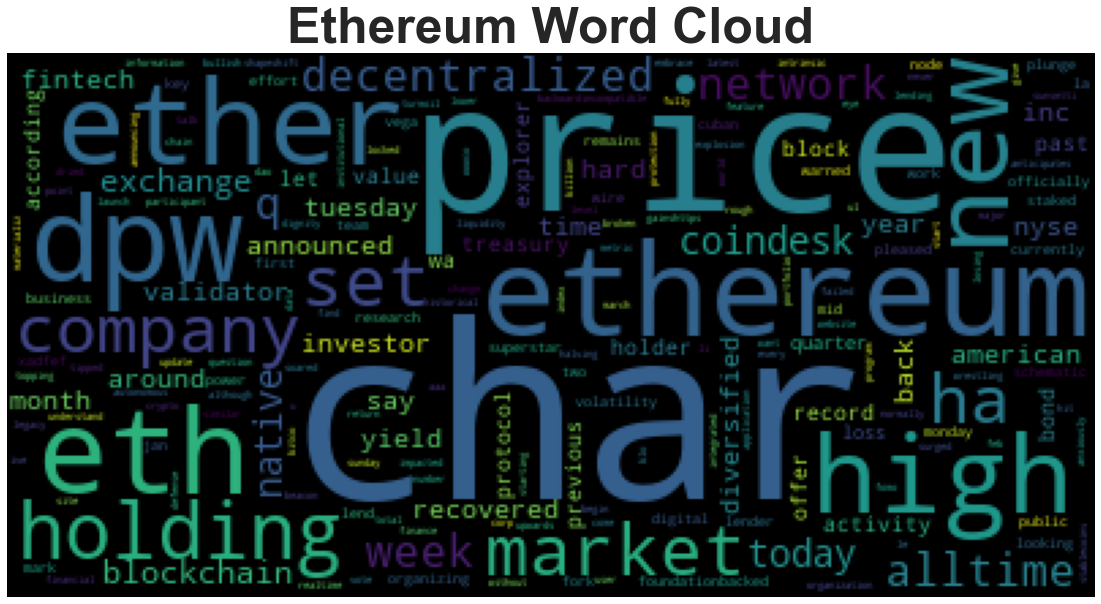

In [99]:
# Generate the Ethereum word cloud
eth_corpus = ''
for token in eth_df.Text:
    eth_corpus += token
str2 = " ".join(str(x) for x in tokenizer(eth_corpus))
wc = WordCloud(collocations=False).generate(str2)
plt.title('Ethereum Word Cloud', fontsize=50, fontweight='bold')
plt.style.use('seaborn-whitegrid')
plt.imshow(wc)
plt.axis("off")
plt.show()

**3 - Named Entity Recognition**

---
In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.


In [101]:
import spacy
from spacy import displacy

In [102]:
# Load the English language model for spaCy
nlp = spacy.load("en_core_web_sm")

**Bitcoin NER**

In [104]:
# Concatenate all of the Bitcoin text together
btc_corpus

'As the man himself said, it was inevitable.\xa0\r\nOn Friday, Tesla CEO Elon Musk changed his Twitter bio to "#bitcoin." This alone perhaps wouldn\'t be that interesting after all, Musk expressed his inter… [+2792 chars]February\r\n1, 2021\r\n6 min read\r\nThis story originally appeared on Market BeatAs technical as cryptocurrency and Bitcoin (BTC) markets are there are some fundamentals driving the market. These include … [+6273 chars]TL;DR: The Bitcoin and Cryptocurrency Mastery Bundle is on sale for £21.11 as of Jan. 28, saving you 70% on list price.\r\nBitcoin and the blockchain are not going away anytime soon. Though market\'s vo… [+3074 chars]January\r\n25, 2021\r\n4 min read\r\nThis article was translated from our Spanish edition using AI technologies. Errors may exist due to this process.\r\nThe vertiginous rise that the price of Bitcoin experi… [+2796 chars]January\r\n28, 2021\r\n4 min read\r\nThis article was translated from our Spanish edition using AI technologies. Errors 

In [105]:
# Run the NER processor on all of the text
btc_ner = nlp(btc_corpus)
btc_ner.user_data["title"] = "Bitcoin NER"


In [107]:
# Render the visualization
displacy.render(btc_ner, style='ent')

In [112]:
# List all Entities if it is Person
print([ent.text for ent in btc_ner.ents if ent.label_ == 'PERSON'])

['Musk', 'Donald Trump', 'Mark Cuban', 'Warren Buffett', 'Larry Fink']


In [121]:
# List all Entities
btc_ent= ([ent.text for ent in btc_ner.ents ])
set(btc_ent)

{'$150 million',
 '1, 2021',
 '2%',
 '2013',
 '21.11',
 '25 years of age',
 '25, 2021',
 '28, 2021',
 '30,000',
 '34,000',
 '4 min',
 '4, 2021',
 '4,812.66',
 '5 min',
 '6 min',
 '70%',
 '95%',
 'AI',
 'American',
 'BTC',
 'Bitcoin',
 'Bloomberg',
 'China',
 'Donald Trump',
 'Elon Musk',
 'Ethereum',
 'Friday',
 'India',
 'Jan. 28',
 'January 2',
 'Larry Fink',
 'Marathon Patent Group',
 'Mark Cuban',
 'Monday',
 'Musk',
 'One day',
 'Spanish',
 'Tesla',
 'Thursday',
 'Tuesday',
 'Twitter',
 'U.S.',
 'Warren Buffett',
 'Wednesday',
 'around $36,000',
 'digital',
 'eight',
 'first',
 'over $30,000',
 'over $40,000',
 'several weeks',
 'the fall'}

**Ethereum NER**


In [109]:
# Concatenate all of the Ethereum text together
eth_corpus

'The Bitcoin price recovered back to around $36,000 on Tuesday, as the cryptocurrency market recovered from Monday\'s plunge, but volatility remains high and superstar investor Mark Cuban warned the re… [+3408 chars]After two months of hard work, time and effort, we’re pleased to say the CoinDesk Ethereum 2.0 validator node is set up and our 32 ETH officially staked.\xa0\r\nHeres our public validator key:\xa0\r\n0xad7fef3… [+9170 chars]LAS VEGAS--(BUSINESS WIRE)--Jan 13, 2021--\r\nDPW Holdings, Inc. (NYSE American: DPW), a diversified holding company ( DPW, or the Company ), announced today that its fintech lender, Digital Power Lend… [+4885 chars]Eth 2.0 is looking at its first hard fork this year.\r\nThe Ethereum Foundation-backed research team is currently organizing schematics for a\xa0 mid-2021 backward-incompatible change to the Beacon Chain,… [+6208 chars]In the legacy financial world, yield has dried up. Yields on U.S. Treasury bonds have never been lower. The 10-year Treasury 

In [114]:
# Run the NER processor on all of the text
eth_ner = nlp(eth_corpus)
eth_ner.user_data["title"] = "Ethereum NER"


In [115]:
# Render the visualization
displacy.render(eth_ner, style='ent')

In [118]:
# List all Entities if it is Person
print([ent.text for ent in eth_ner.ents if ent.label_ == 'MONEY'])

['around $36,000', '$2.4 billion', '1,454.32', '1,439.3', '1,439.33']


In [120]:
# List all Entities
eth_ents = ([ent.text for ent in eth_ner.ents])
set(eth_ents)


{'$2.4 billion',
 '1,439.3',
 '1,439.33',
 '1,454.32',
 '10-year',
 '2%',
 '2020',
 '32',
 'AAA corp…',
 'American',
 'Anticipates New Lending Program to Begin',
 'Bitcoin',
 'Christine Kim',
 'CoinDesks',
 'DPW Holdings,',
 'Digital Power Lend',
 'ETH',
 'Ethereum 2.0',
 'FOMO',
 'Feb. 12',
 'March 2021',
 'Mark Cuban',
 'Monday',
 'NYSE',
 'Q4',
 'ShapeShift',
 'Sunday',
 'The Ethereum Foundation',
 'Today',
 'Treasury',
 'Tuesday',
 'U.S. Treasury',
 'WIRE)--Jan 13, 2021--',
 'Will Foxley',
 'XRP',
 'around $36,000',
 'around 2.1%-2.3%',
 'at least five months',
 'bitcoin',
 'chars]After two months',
 'fintech',
 'first',
 'last weeks',
 'less than 0.9%',
 'the Beacon Chain',
 'the CoinDesk Ethereum 2.0',
 'the Protection and Dignity of Our Users',
 'the quarter',
 'the week',
 'this past week',
 'this year',
 'today',
 'ul><li'}